In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
π = np.pi

In [3]:
plt.style.use('../default_colors.mplstyle')

Задача аппроксимировать функцию:
$$
\mathbf{r}(t) = 
\begin{pmatrix}
    t\\
    \sin{t}
 \end{pmatrix}
$$

Сперва по трем точкам квадратным параметрическим полиномом (часть параболы):
$$
  \mathbf{r}(t) = \mathbf{a}_2 t^2 + \mathbf{a}_1 t + \mathbf{a}_0 = 
  \begin{bmatrix}
    a_{x_2}\\
    a_{y_2}
 \end{bmatrix}t^2 + 
  \begin{bmatrix}
    a_{x_1}\\
    a_{y_1}
 \end{bmatrix}t + 
  \begin{bmatrix}
    a_{x_0}\\
    a_{y_0}
 \end{bmatrix}
 =
  \begin{bmatrix}
    a_{x_2} t^2  + a_{x_1} t + a_{x_0}\\
    a_{y_2} t^2  + a_{y_1} t + a_{y_0}
 \end{bmatrix}
$$

Затем по четырем точкам кубическим параметрическим полиномом (часть кубической параболы):
$$
  \mathbf{r}(t) = \mathbf{a}_3t^3 + \mathbf{a}_2t^2 + \mathbf{a}_1t + \mathbf{a}_0 = 
  \begin{bmatrix}
    a_{x_3}\\
    a_{y_3}
 \end{bmatrix}t^3 + 
  \begin{bmatrix}
    a_{x_2}\\
    a_{y_2}
 \end{bmatrix}t^2 + 
  \begin{bmatrix}
    a_{x_1}\\
    a_{y_1}
 \end{bmatrix}t + 
  \begin{bmatrix}
    a_{x_0}\\
    a_{y_0}
 \end{bmatrix}
 =
  \begin{bmatrix}
    a_{x_3} t^3  + a_{x_2} t^2  + a_{x_1} t + a_{x_1}\\
    a_{x_3} t^3  + a_{y_2} t^2  + a_{y_1} t + a_{y_1}
 \end{bmatrix}
$$

подробные формулы см. презентацию.

$$
    \left\{
    \begin{aligned}
        \mathbf{r}(t_0) = \mathbf{p}_0\\
        \mathbf{r}(t_1) = \mathbf{p}_1\\
        \mathbf{r}(t_2) = \mathbf{p}_2\\
    \end{aligned}
    \right.
    \Leftrightarrow
    \left\{
    \begin{aligned}
        \mathbf{a}_2 t_0^2 + \mathbf{a}_1 t_0 + \mathbf{a}_0 = \mathbf{p}_0\\
        \mathbf{a}_2 t_1^2 + \mathbf{a}_1 t_1 + \mathbf{a}_0 = \mathbf{p}_1\\
        \mathbf{a}_2 t_2^2 + \mathbf{a}_1 t_2 + \mathbf{a}_0 = \mathbf{p}_2\\
    \end{aligned}
    \right.
    \Leftrightarrow
    \begin{bmatrix}
        1 & t_1 & t^2_1\\
        1 & t_2 & t^2_2\\
        1 & t_3 & t^2_3
    \end{bmatrix}
    \begin{bmatrix}
        \mathbf{a}^T_0\\
        \mathbf{a}^T_1\\
        \mathbf{a}^T_2\\
    \end{bmatrix}
    =
    \begin{bmatrix}
        \mathbf{p}^T_0\\
        \mathbf{p}^T_1\\
        \mathbf{p}^T_2\\
    \end{bmatrix}
    \Leftrightarrow
    \begin{bmatrix}
        1 & t_1 & t^2_1\\
        1 & t_2 & t^2_2\\
        1 & t_3 & t^2_3
    \end{bmatrix}
    \begin{bmatrix}
        a_{0_x} & a_{0_y}\\
        a_{1_x} & a_{1_y}\\
        a_{2_x} & a_{2_y}\\
    \end{bmatrix}
    =
    \begin{bmatrix}
        \mathbf{p}^T_0\\
        \mathbf{p}^T_1\\
        \mathbf{p}^T_2\\
    \end{bmatrix}
$$

Если дан набор значений параметра $t$: $t_1, t_2, t_3,\ldots,t_m$, то значения параметрического полинома можно найти с помощью матричного умножения:
$$
    \begin{bmatrix}
        \mathbf{r}^T_1(t)\\
        \mathbf{r}^T_2(t)\\
        \vdots\\
        \mathbf{r}^T_m(t)\\
    \end{bmatrix}
    =
    \begin{bmatrix}
        x_1 & y_1\\
        x_2 & y_2\\
        \vdots\\
        x_m & y_m\\
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 & t_1 & t^2_1\\
        1 & t_2 & t^2_2\\
        \vdots & \vdots & \vdots\\
        1 & t_m & t^2_m
    \end{bmatrix}
    \begin{bmatrix}
        \mathbf{a}^T_0\\
        \mathbf{a}^T_1\\
        \mathbf{a}^T_2\\
    \end{bmatrix}
$$

In [4]:
def func(t):
    """Функция, которую хотим аппроксимировать"""
    return np.array([t, np.sin(t)])

In [14]:
def fabric_of_quadratic_polynomial(t, P):
    """Производим квадратные трехчлены"""
    assert P.shape == (3, 2), "На вход три точки (x, y) в виде матрицы 3х2"
    
    T = np.array([np.ones_like(t), t, t**2]).T
    A = np.linalg.solve(T, P)
    
    def P(t):
        """Квадратный трехчлен"""
        T = np.array([np.ones_like(t), t, t**2]).T
        return np.matmul(T, A)
        # или
        #return np.array([A[0] + A[1] * t + A[2] * t**2 for t in t])
    return P

In [15]:
def fabric_of_cubic_polynomial(t, P):
    """Производим квадратные трехчлены"""
    assert P.shape == (4, 2), "На вход четыре точки (x, y) в виде матрицы 4х2"
    
    T = np.array([np.ones_like(t), t, t**2, t**3]).T
    A = np.linalg.solve(T, P)
    
    return lambda t: np.matmul(np.array([np.ones_like(t), t, t**2, t**3]).T, A)

In [31]:
ts = np.linspace(0, 1.9*π, 100)
ts

array([0.        , 0.06029319, 0.12058638, 0.18087958, 0.24117277,
       0.30146596, 0.36175915, 0.42205235, 0.48234554, 0.54263873,
       0.60293192, 0.66322512, 0.72351831, 0.7838115 , 0.84410469,
       0.90439789, 0.96469108, 1.02498427, 1.08527746, 1.14557065,
       1.20586385, 1.26615704, 1.32645023, 1.38674342, 1.44703662,
       1.50732981, 1.567623  , 1.62791619, 1.68820939, 1.74850258,
       1.80879577, 1.86908896, 1.92938215, 1.98967535, 2.04996854,
       2.11026173, 2.17055492, 2.23084812, 2.29114131, 2.3514345 ,
       2.41172769, 2.47202089, 2.53231408, 2.59260727, 2.65290046,
       2.71319366, 2.77348685, 2.83378004, 2.89407323, 2.95436642,
       3.01465962, 3.07495281, 3.135246  , 3.19553919, 3.25583239,
       3.31612558, 3.37641877, 3.43671196, 3.49700516, 3.55729835,
       3.61759154, 3.67788473, 3.73817793, 3.79847112, 3.85876431,
       3.9190575 , 3.97935069, 4.03964389, 4.09993708, 4.16023027,
       4.22052346, 4.28081666, 4.34110985, 4.40140304, 4.46169

In [34]:
t = np.linspace(0, 6, 3)
P = np.array([t, np.sin(t)]).T

pol2d = fabric_of_quadratic_polynomial(t, P)

t = np.linspace(0, 1.9*π, 4)
P = np.array([t, np.sin(t)]).T

pol3d = fabric_of_cubic_polynomial(t, P)

X1, Y1 = pol2d(ts).T
X2, Y2 = pol3d(ts).T

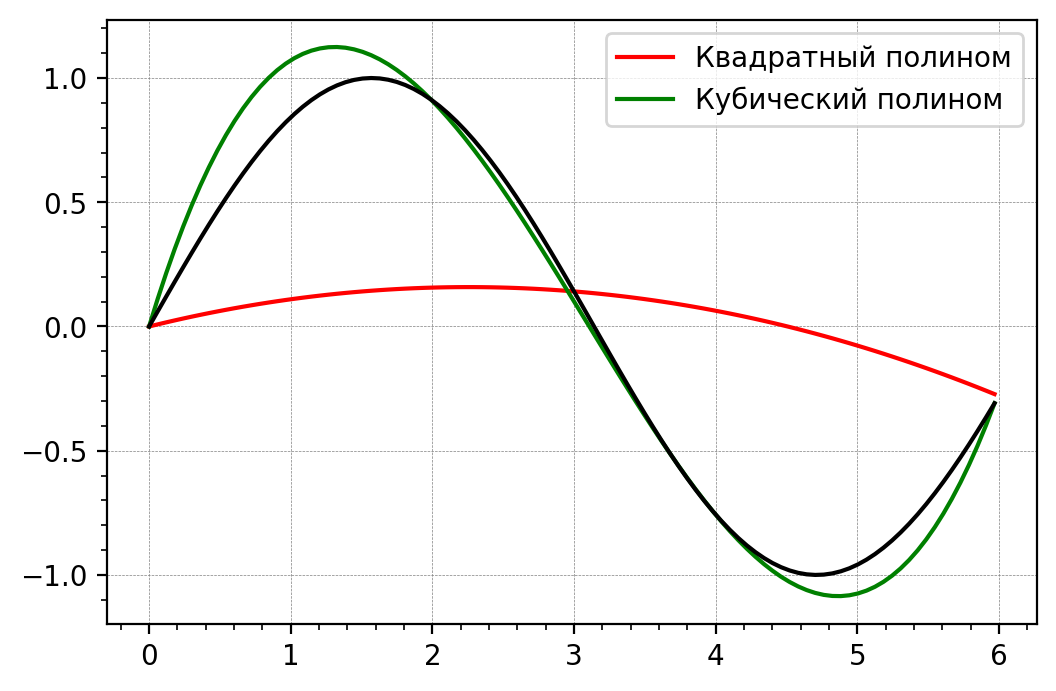

In [35]:
fig01 = plt.figure(num=1)
ax01 = fig01.add_subplot(1,1,1)

# ax01.set_aspect('equal')

ax01.plot(X1, Y1, color='red', label='Квадратный полином')
ax01.plot(X2, Y2, color='green', label='Кубический полином')
ax01.plot(*func(ts), color='k')

ax01.legend(loc='best')